#**IRIS FLOWER CLASSIFICATION**

#**Task To Be Done**

This Task is assigned by: CodeAlpha. Which is a leading software develpoment company

## 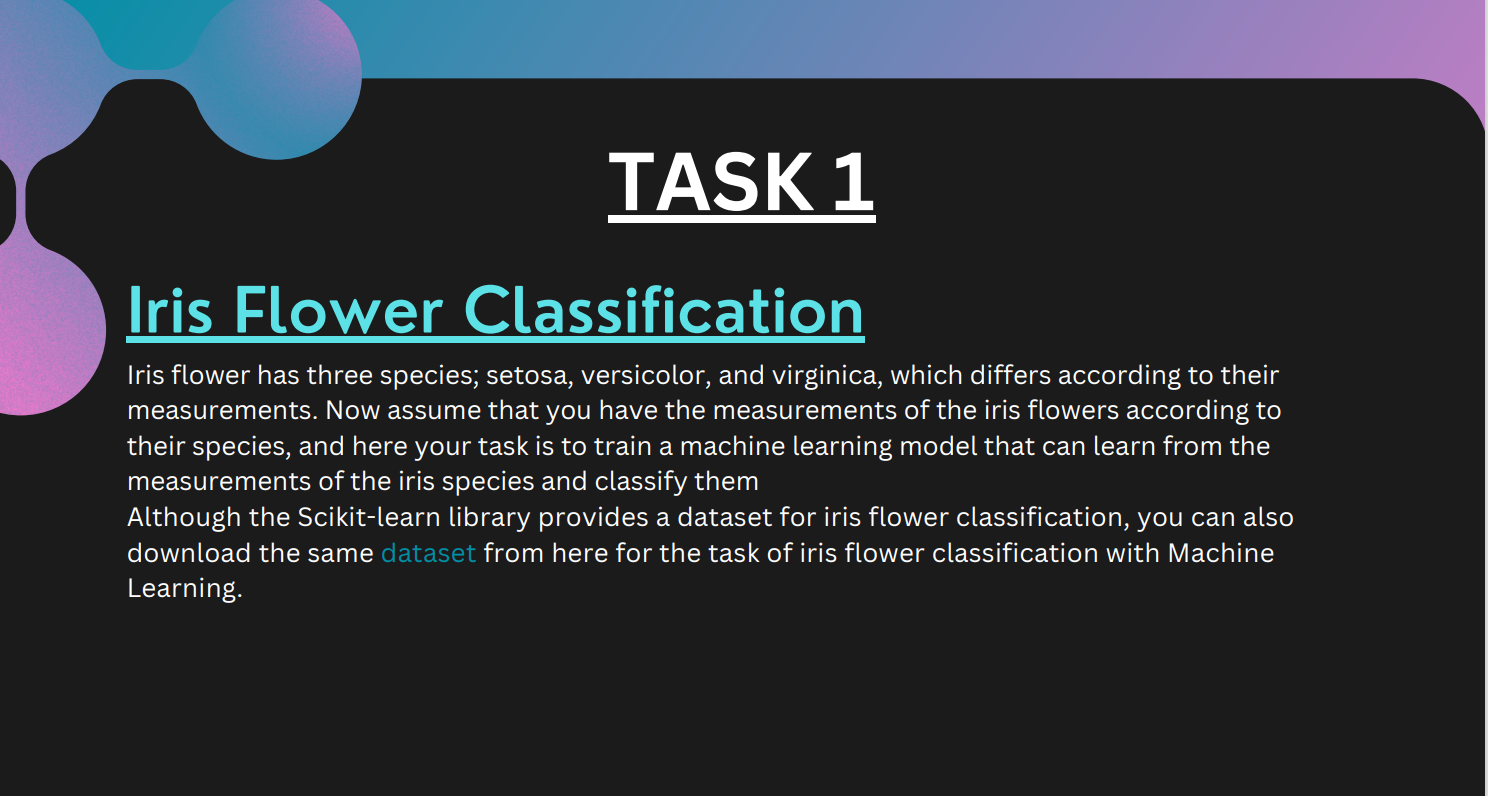

# **Dataset Overview**



## Data Columns

This dataset contains information about Iris flowers with the following attributes:

- Id: Unique identifier for each entry.
- Sepal Length (cm): Length of the sepal in centimeters.
- Sepal Width (cm): Width of the sepal in centimeters.
- Petal Length (cm): Length of the petal in centimeters.
- Petal Width (cm): Width of the petal in centimeters.
- Species: The species of the flower.


## Some Explanation

- Sepals are small leaf-like green outermost part of flowers. Together, they form the outermost whorl of a flower.

- Petals are modified leaves that surround the reproductive parts of flowers. They are often brightly coloured or unusually shaped to attract pollinators. All of the petals of a flower are collectively known as the corolla.

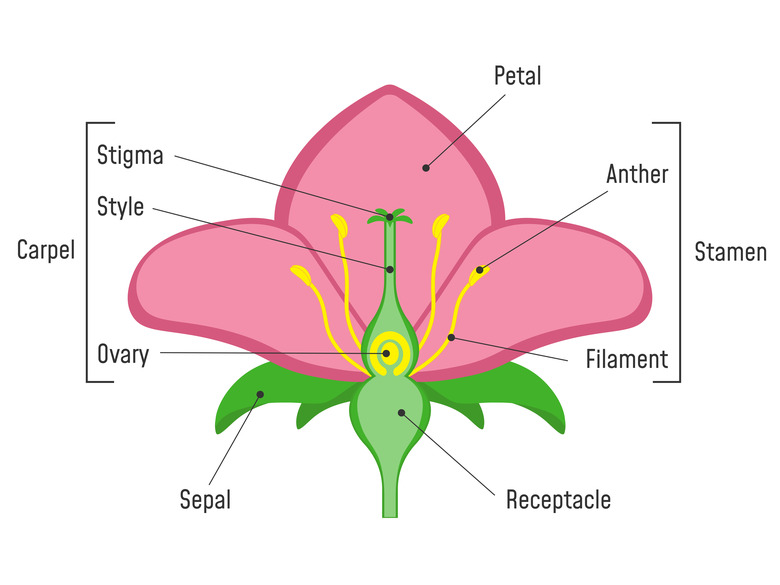

# **Importing Libraries**


In [2]:
# Importing the necessary Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# **Downloading The Dataset**

In [3]:
!pip install Kaggle
!pip install opendatasets

In [4]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/saurabh00007/iriscsv/code?datasetId=4247&sortBy=voteCount')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: naglaareda
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/saurabh00007/iriscsv


100%|██████████| 1.28k/1.28k [00:00<00:00, 2.09MB/s]

# **Loading the Data**

In [5]:
# Load the 'accident cleaned data.csv' dataset
df =  pd.read_csv('/content/iriscsv/Iris.csv')

# Check the first few rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Exploring & Preprocessing the Data**

In [6]:
# Check for missing values
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [7]:
# Check for duplicate values
df.duplicated().sum()

0

In [8]:
print(df.shape)

(150, 6)


In [9]:
# Get information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [10]:
# Display stats about the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,150.0,NaN,NaN,NaN,75.5,43.445368,1.0,38.25,75.5,112.75,150.0
SepalLengthCm,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we will drop (Id) as it doesn't contribute to predicting Iris Flower.

In [11]:
# Drop irrelevant columns
df = df.drop(['Id'], axis=1)

In [12]:
# Display the number of samples on each class
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [13]:
# Converting class labels into numerical form
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
df["Species"]

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


where:
- Iris-setosa: 0
- Iris-versicolor: 1
- Iris-virginica: 2

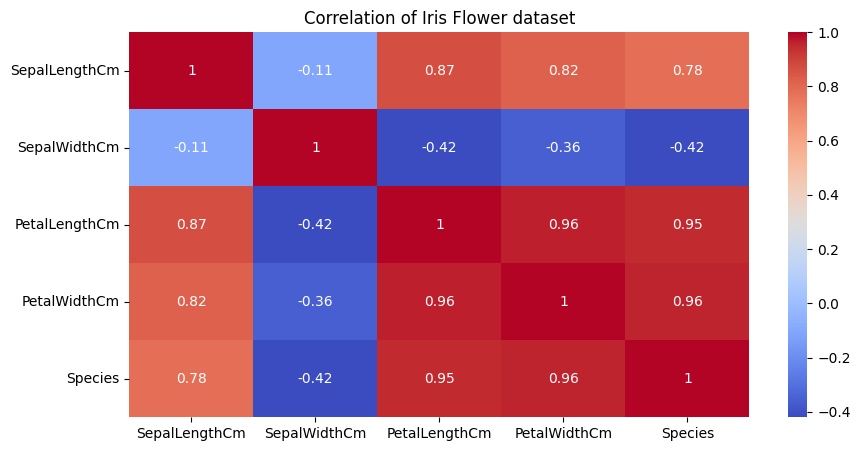

In [14]:
# Check Correlation
correlation_matrix = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation of Iris Flower dataset")
plt.show()


Feature Relationships:
- Petal Length and Petal Width are highly correlated (0.96). This might suggest multicollinearity, which could affect model interpretability for certain algorithms.
- Sepal Width has weak or moderate negative correlations with other features, showing it may vary independently compared to other features.

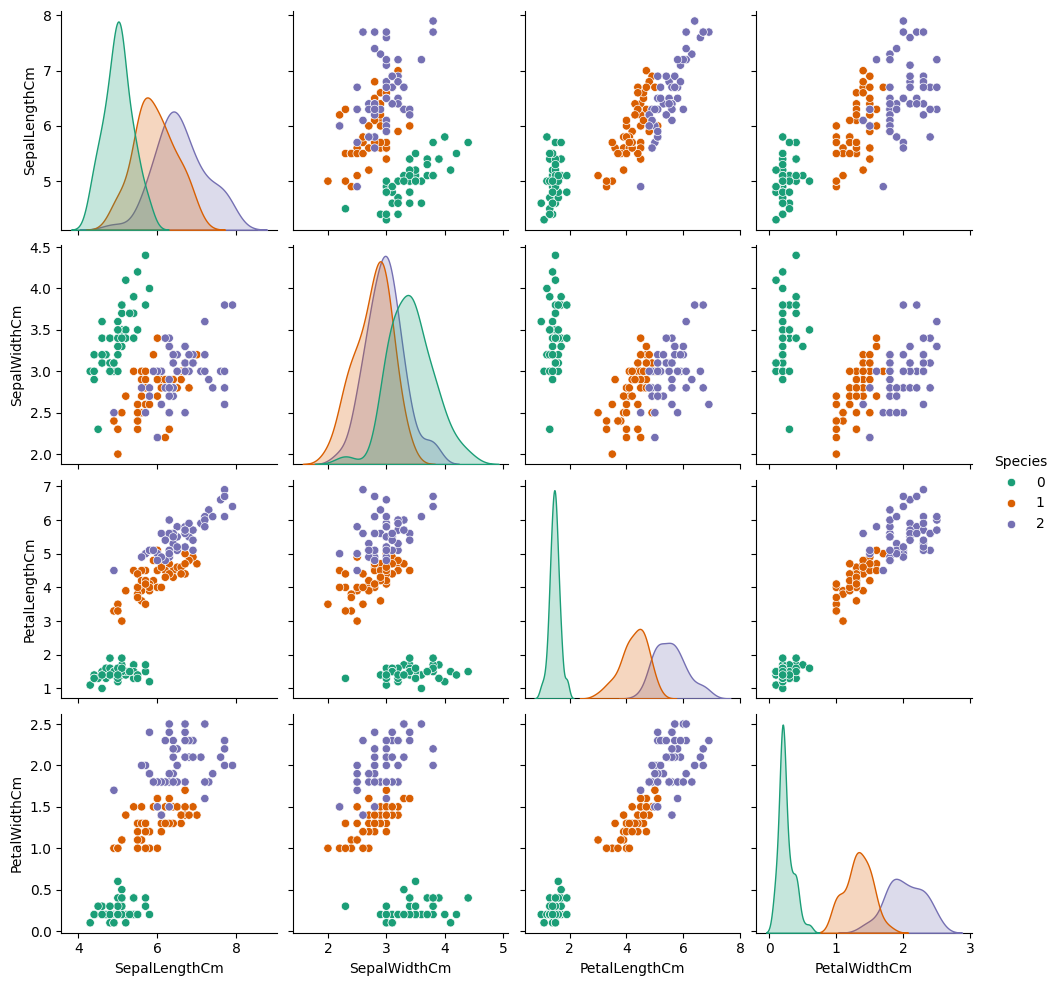

In [15]:
# Pair plot
sns.pairplot(df,hue= 'Species' , palette = 'Dark2', diag_kind = 'kde')
plt.show()

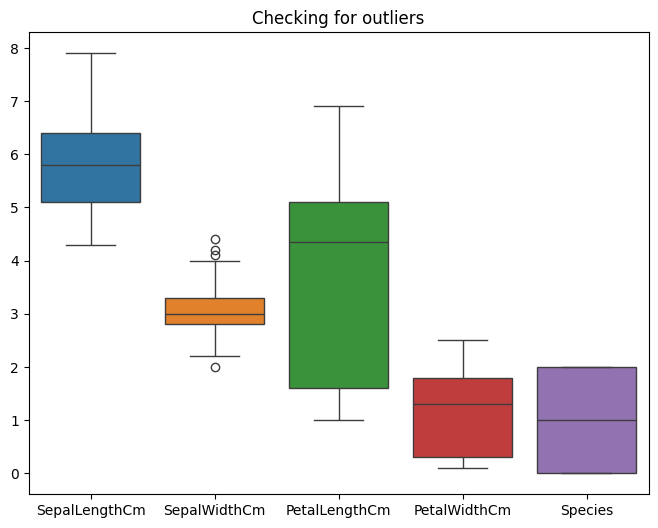

In [16]:
# Checking for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title("Checking for outliers")
plt.show()

<Axes: >

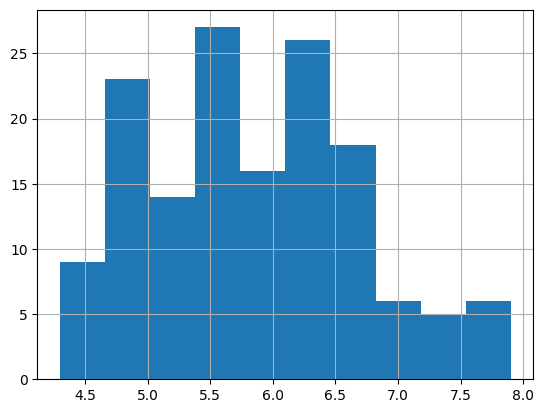

In [17]:
# histograms
df['SepalLengthCm'].hist()

<Axes: >

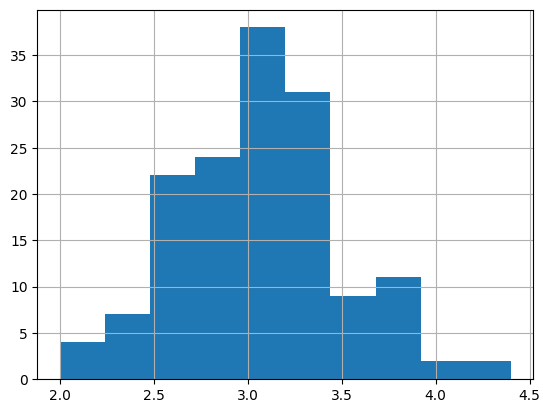

In [18]:
df['SepalWidthCm'].hist()

<Axes: >

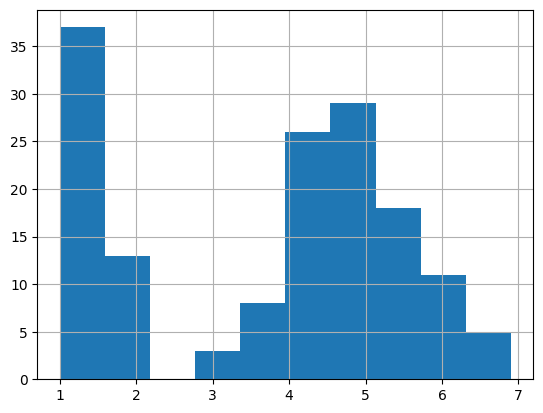

In [19]:
df['PetalLengthCm'].hist()


<Axes: >

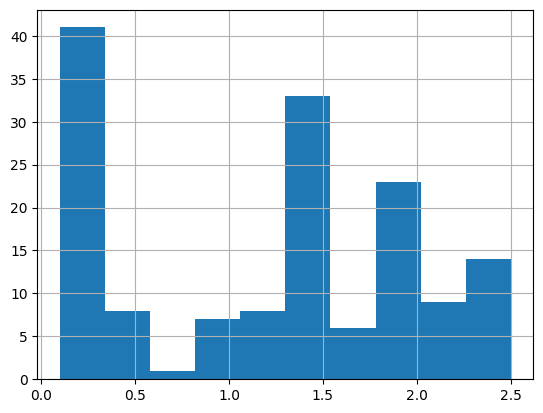

In [20]:
df['PetalWidthCm'].hist()


# **Model Training**

## Train-Test Split

In [21]:
# Split the dataset into features and target variable
X = df.drop('Species', axis=1)
y = df['Species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Feature Scaling

In [22]:
# Initialize the StandardScaler and scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Define and Train Models

Model: Logistic Regression
Accuracy: 100.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


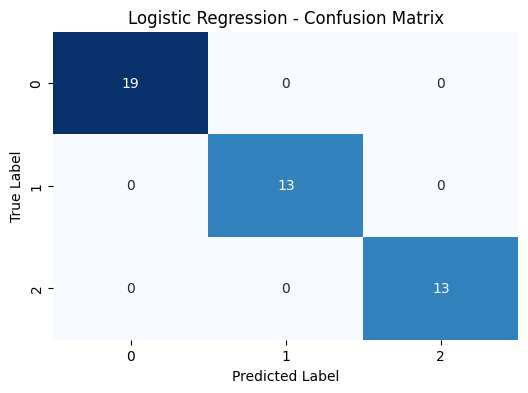


--------------------------------------------------

Model: K-Nearest Neighbors
Accuracy: 100.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


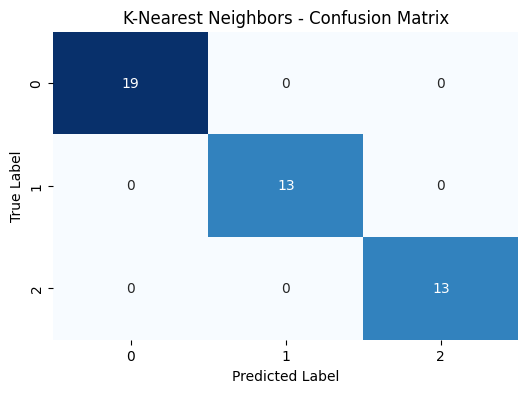


--------------------------------------------------

Model: Decision Tree
Accuracy: 100.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


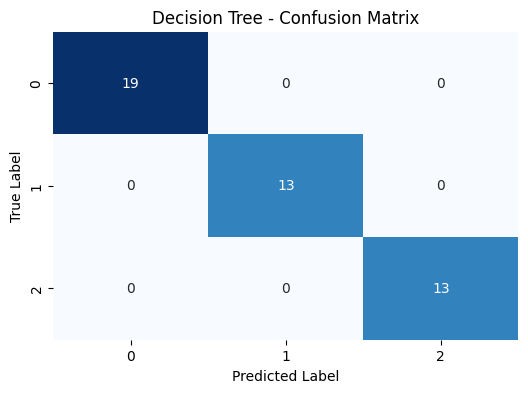


--------------------------------------------------

Model: Random Forest
Accuracy: 100.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


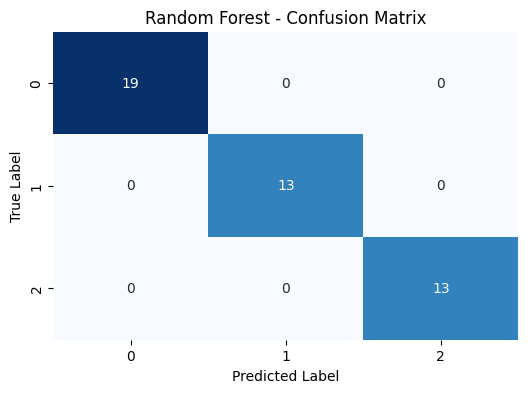


--------------------------------------------------



In [23]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Dictionary to store model results
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)*100
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    }

# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print("Classification Report:\n", metrics['Classification Report'])
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])
# Display Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    print("\n" + "-"*50 + "\n")

# **Model Testing**

In [24]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Get input values from the user for TV, Radio, and Newspaper
inputs = {
    "SepalLengthCm": "Enter the SepalLength value: ",
    "SepalWidthCm	": "Enter the SepalWidth value: ",
    "PetalLengthCm	": "Enter the PetalLenth value: ",
    "PetalWidthCm	": "Enter the PetalWidth value:"
}

# Collect inputs as floats and store them in a dictionary
# Remove trailing tab characters from keys
new_data = {key.strip(): [float(input(prompt))] for key, prompt in inputs.items()}

# Convert the dictionary into a DataFrame
new_data_df = pd.DataFrame(new_data)

# Scale the input data using the fitted scaler
new_data_scaled = scaler.transform(new_data_df)

# Make predictions using the trained model
predicted_Species = logreg.predict(new_data_scaled)

# Output the predicted sales value
print("\n-------------------------------------")
print(f"Predicted Species: {abs(predicted_Species[0]):.2f}")


Enter the SepalLength value: 3.45
Enter the SepalWidth value: 3.23
Enter the PetalLenth value: 5.44
Enter the PetalWidth value:6.45

-------------------------------------
Predicted Species: 2.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
